## Data Science Central Challenge: Identifying patterns in complex time series 

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import datetime

train=pd.read_csv("DATA/DSC_Time_Series_Challenge.csv",dtype = {'Day ':str,'Pageviews':int})[:]
time=[datetime.datetime.strptime(t[0],"%m/%d/%y") for t in train[['Day ']].values]
train['time']=time

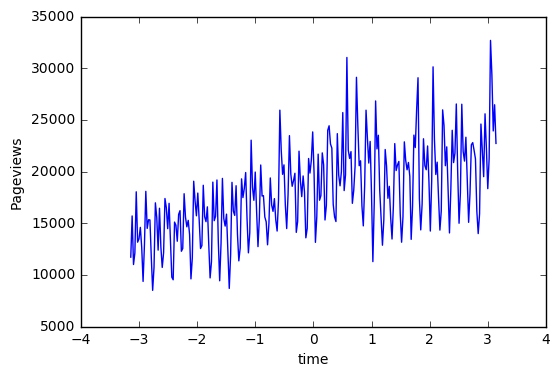

In [3]:
seasonal_component='time'

minsec=min(train[seasonal_component])
maxsec=max(train[seasonal_component])
train[seasonal_component]=train[seasonal_component].apply(lambda x: (x - minsec) / (maxsec - minsec)* 2*np.pi - np.pi)

plt.plot(train['time'],train['Pageviews'],'-')
plt.xlabel('time')
plt.ylabel('Pageviews')
plt.show()

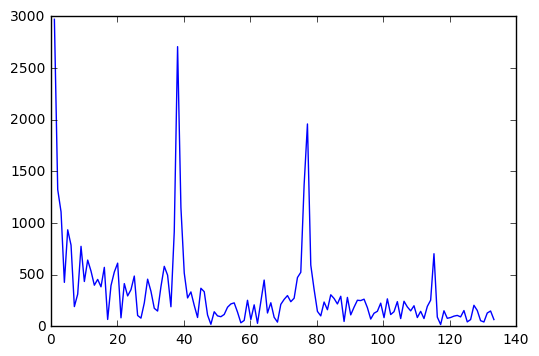

[(0.0, 35927.059701492537),
 (1.0025062656641606, 2972.5057778347123),
 (2.0050125313283211, 1324.7940732057514),
 (3.0075187969924819, 1108.8671135534014),
 (4.0100250626566423, 426.6256965548564),
 (5.0125313283208026, 935.18886411677954),
 (6.0150375939849638, 787.03523948290479),
 (7.0175438596491242, 192.1658504629049),
 (8.0200501253132845, 312.57085116402351),
 (9.0225563909774458, 775.24411475791521),
 (10.025062656641605, 435.00777690783951),
 (11.027568922305766, 642.39733772284092),
 (12.030075187969928, 535.45238843478273),
 (13.032581453634087, 399.05037102706785),
 (14.035087719298248, 455.162934967127),
 (15.037593984962408, 383.50522292429451),
 (16.040100250626569, 571.80763568010252),
 (17.042606516290729, 67.792530151337502),
 (18.045112781954892, 395.42984853026593),
 (19.047619047619051, 526.81290542627494),
 (20.05012531328321, 612.63174592437622),
 (21.052631578947373, 83.477593883232942),
 (22.055137844611533, 414.56847651976716),
 (23.057644110275692, 295.43356

In [6]:
T=3./800 
N=len(train)
tr=[]


train.sort_values(by=[seasonal_component])

from scipy.fftpack import fft
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt

yf = fft(train['Pageviews'])
freq= fftfreq(len(yf),T)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
tr.append( 2.0/N * np.abs(yf[:N//2]))

plt.plot(xf[1:],tr[0][1:])
plt.show()

[(i,x) for i,x in zip(xf,tr[0])]

In [7]:
def filter_rule(x,freq,band,f_signal):
    if abs(freq)>f_signal+band or abs(freq)<f_signal-band:
        return 0
    else:
        return x

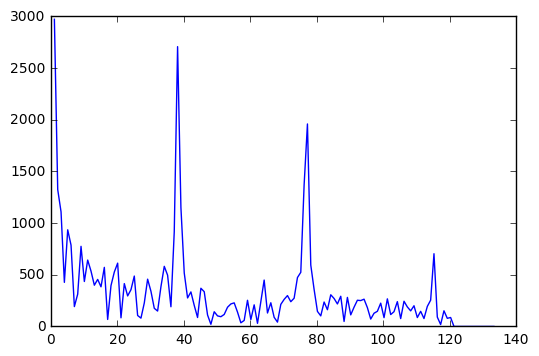

[(0.0, 35927.059701492537), (1.0025062656641606, 2972.5057778347123)]


In [8]:
mi = []
for x in tr:
    F_filtered = np.array([filter_rule(x,f,60,60) for x,f in zip(x,freq)])

plt.plot(xf[1:],F_filtered[1:])
plt.show()
frequency_components=np.array([i for i,x in zip(xf[1:],F_filtered[1:]) if abs(x)>=1500])
print([(i,x) for i,x in zip(xf,F_filtered) if abs(x)>=max(F_filtered[1:]) ])

In [9]:
input_df2=train[[seasonal_component]]
output=train[['Pageviews']]
y=output.values
input_=input_df2.values
m,n =np.shape(input_)
x=input_

frequency_components = 2*np.pi*frequency_components.reshape((len(frequency_components),1))

trig_args = np.dot(frequency_components,x.T ).T
seasonal_x = np.column_stack((np.sin(trig_args),np.cos(trig_args)))

3369342391.05
[  5.17770948e+09]


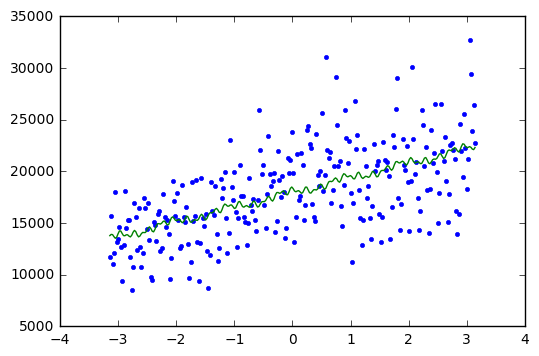

In [10]:
m,n =np.shape(seasonal_x)
x=np.ones((m,n+2))
x[:,1:]=np.column_stack((seasonal_x,train['time']))


A=x.T.dot(x)
b=x.T.dot(y)
z = np.linalg.solve(A,b)

SSE=np.sum((y-x.dot(z))**2)
print(SSE)
print(sum((y-np.mean(y))**2))

plt.plot(train['time'],y,'.')
plt.plot(train['time'],x.dot(z),'-')
plt.show()

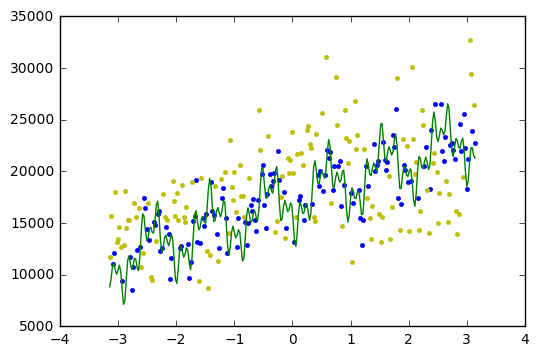

In [11]:
m,n =np.shape(seasonal_x)
x=np.ones((m,n+1))
x=np.column_stack((seasonal_x,train['time']))

from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x, y)

line_X = np.linspace(min(y), max(y),len(y))

model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(x, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_y = model.predict(x)
line_y_ransac = model_ransac.predict(x)

plt.plot(train['time'][inlier_mask], y[inlier_mask],'b.')
plt.plot(train['time'][outlier_mask], y[outlier_mask], 'y.')
# plt.plot(train['time'],line_y_ransac, '-')
plt.plot(train['time'],line_y_ransac, 'g-')
plt.show()